<a href="https://colab.research.google.com/github/sofiaborgato/Brest_Cancer_Classification/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**
##Environment
The analysis is conduced in python language and in particular make use of  the following libraries:

In [ ]:
#Some imports
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
import imblearn


##**Data Exploration**


Load the dataset and save it in a data frame. 



In [ ]:
from sklearn.datasets import load_breast_cancer
headers=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']
X, y = load_breast_cancer(return_X_y=True,as_frame=True)
X.head()
data_set=X.copy()
data_set['label']=y
data_set.head()










mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  label  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

##**Datatset aim and description**

Breast cancer is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics.

The Breast Cancer is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)

* texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter² / area — 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” — 1)

The column 'Label' represent the disgnosis and is 0 if the tumor is classified as malignant, 1 if it is classified as benign.

The aim of this analysis is to perform a binary classification task and  point out wich features are most relevant in predicting if the mass is malignant or bening.







##**Some considerations on the features**

First of all we have to check if there are some null values:

In [ ]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

As we can se there are no null value.

Now I decide to print out some statistics of the data set:


In [ ]:
X.describe()


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Data seems to be well distributed among the values. Such information suggest us that in order to obtain good performance is necessary a standadization .

In the following plot we can see that the the labels are a bit unbalaced in favor of the class 'bening'. We have  357 records for the '1' class and 212 records for the label '0'. We have to keep in mind this information during the classification task in order to adopt a good stretegy as oversampling.





/home/caprino/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


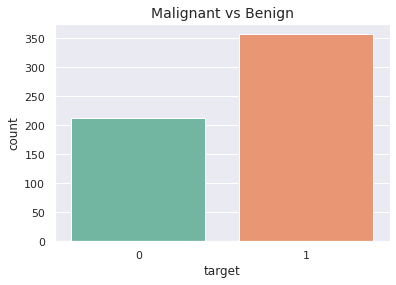

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y, data=X,palette="Set2",)
plt.title('Malignant vs Benign', fontsize=14)
plt.show()


For the futher step i decide to plot some interesting results separatly for each kinf of values( means,worst,se) starting from the 'mean' values.



##**Pair Plots**
A good way to visualize the relationship between couples of features is the module pairplot() provided by seaborn. 



Text(0.5, 0.98, 'PairPolt for the mean')

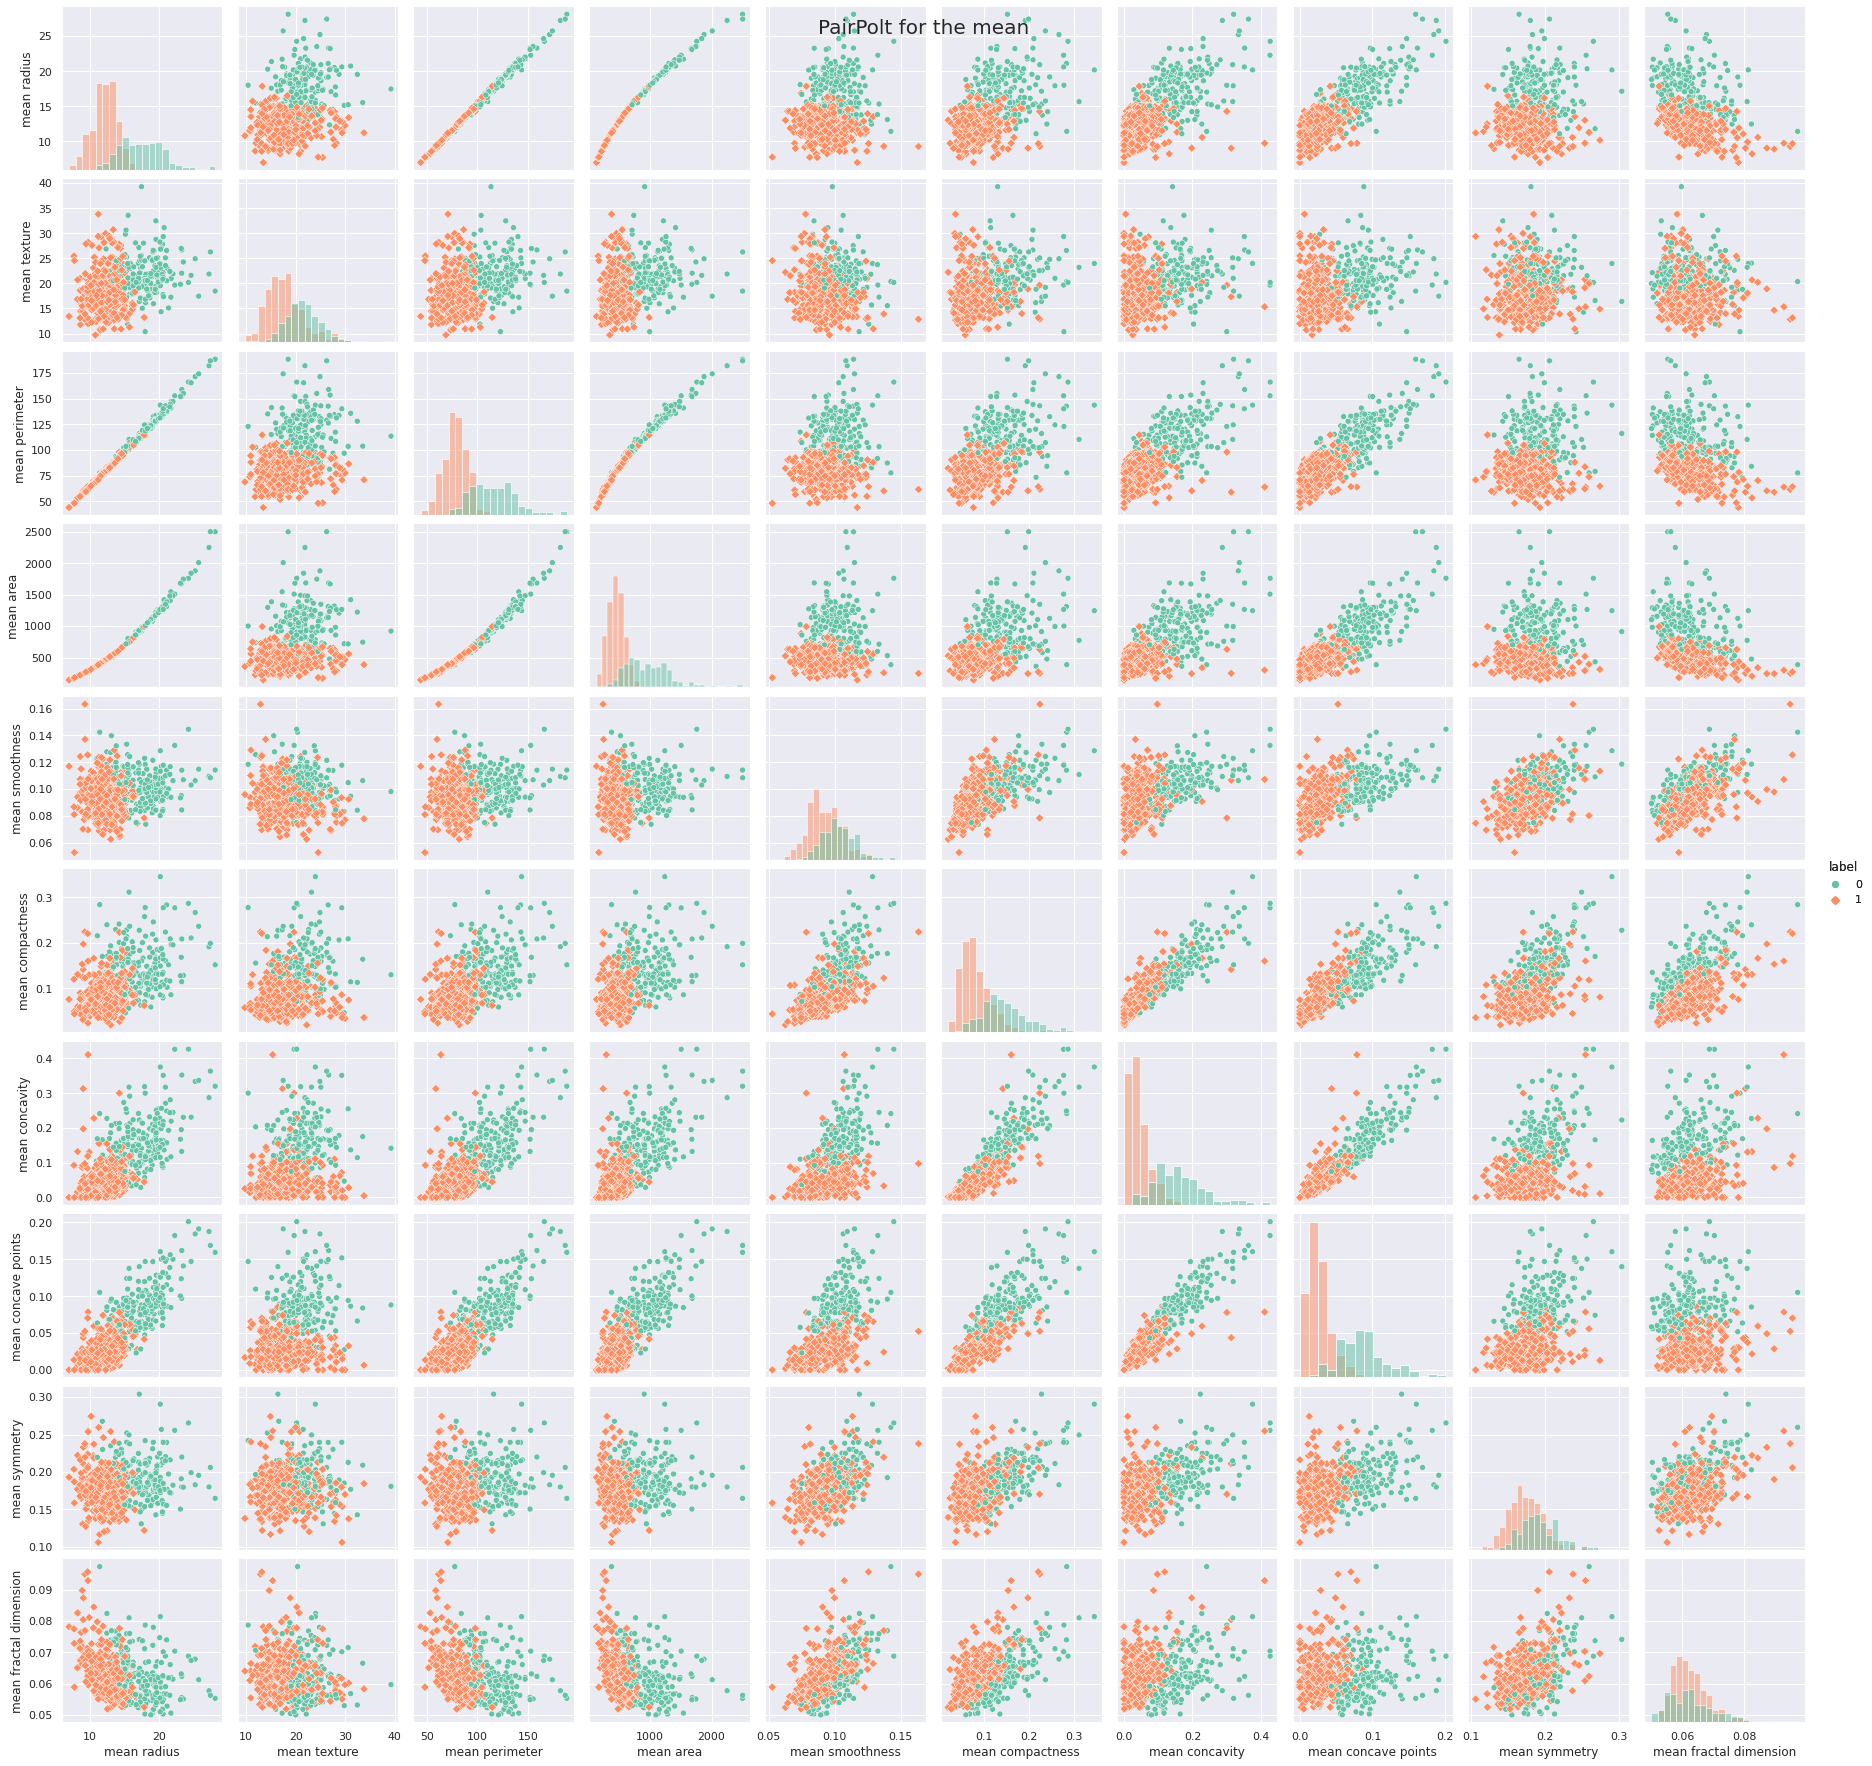

In [ ]:
#PAIRPLOTS FOR THE MEAN
list_mean=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension','label']

mean_data=data_set[list_mean]
mean_data.head()

# Implementing pairplot 
g = sns.pairplot(mean_data, hue = 'label', markers=["o","D"],palette="Set2", diag_kind="hist")
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle('PairPolt for the mean', fontsize = 20)


From the pairplots we can note that for almost all the features the malignant tumors seem to have longer range, except for fractal dimension.
The diagonal represents the distribution of just one feature among the label. We can see that the peak for malignant is reached leater. 
This means that malignant tumour tend to have larger radius, rougher texture, more compactness,concavity and concave points.
We can also recogninze that some feaures have high correlations. For example perimeter with radius, area with radius and area with perimeter. For more specific information we need to compute the correlation matrix.

Text(0.5, 0.98, 'PairPolt for the se')

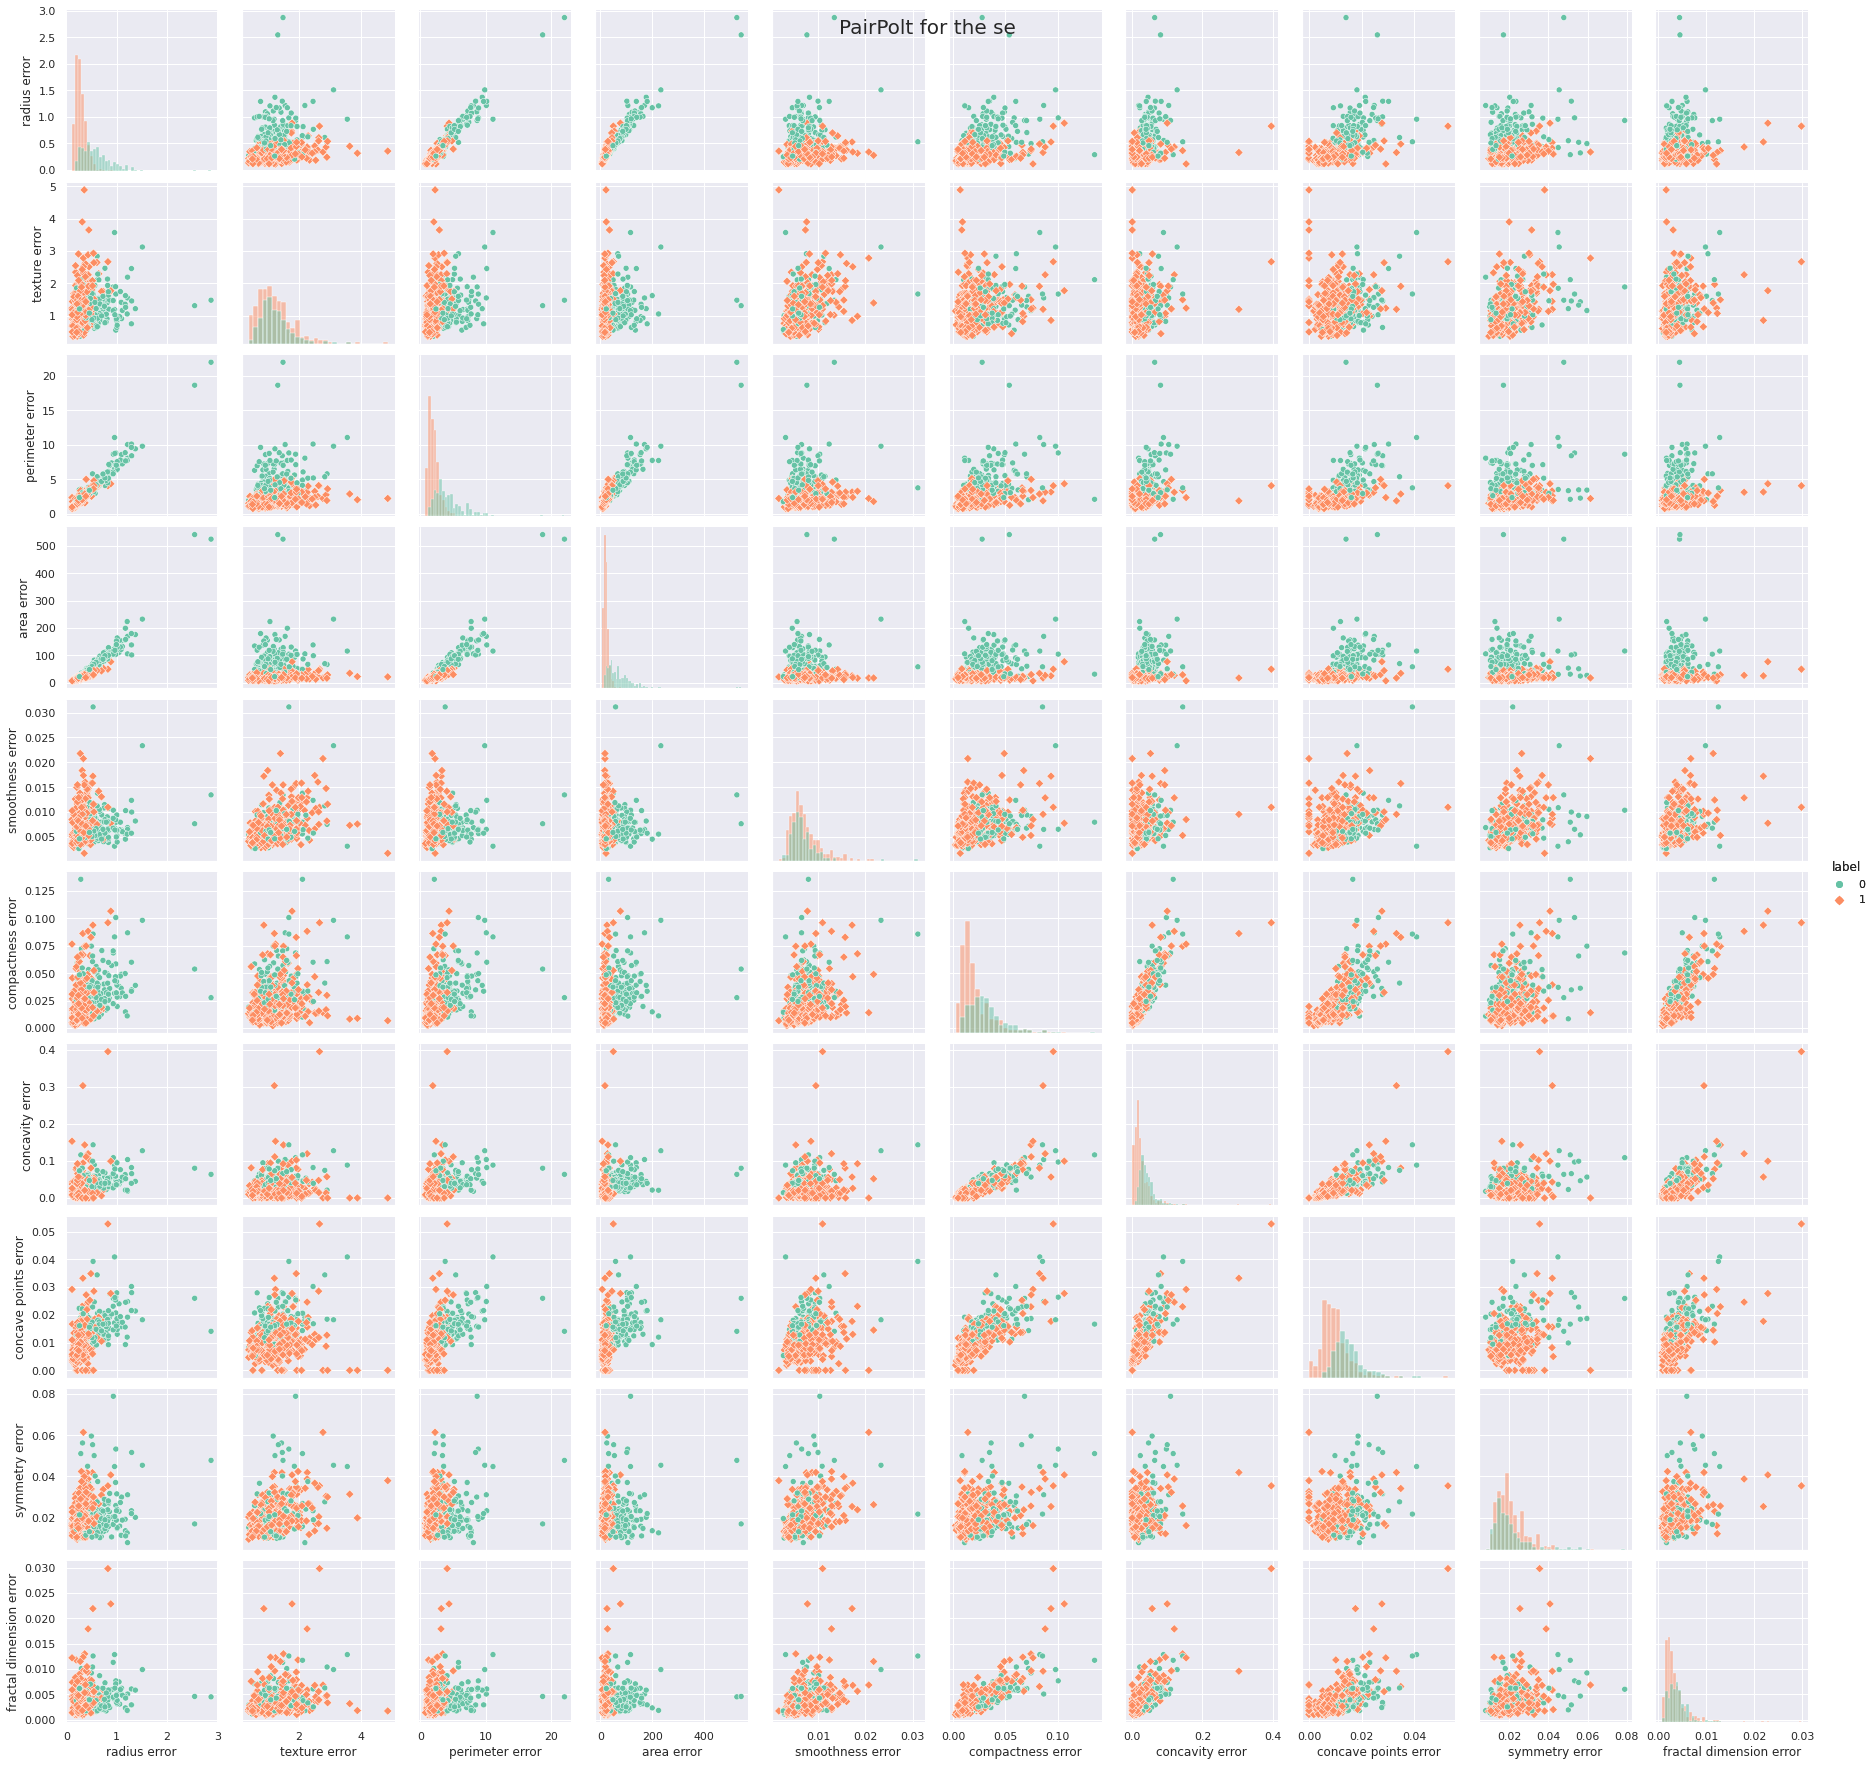

In [ ]:
#PAIRPLOTS FOR SE
list_se=['radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','label']
se_data=data_set[list_se]
g = sns.pairplot(se_data, hue = 'label', markers=["o","D"],palette="Set2", diag_kind="hist")
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle('PairPolt for the se', fontsize = 20)




Even if less obviously also in this case we can observe that the range of the malignant tends to higher values , and also the peak is reached later in the distribution plots.


Text(0.5, 0.98, 'PairPolt for Worst ')

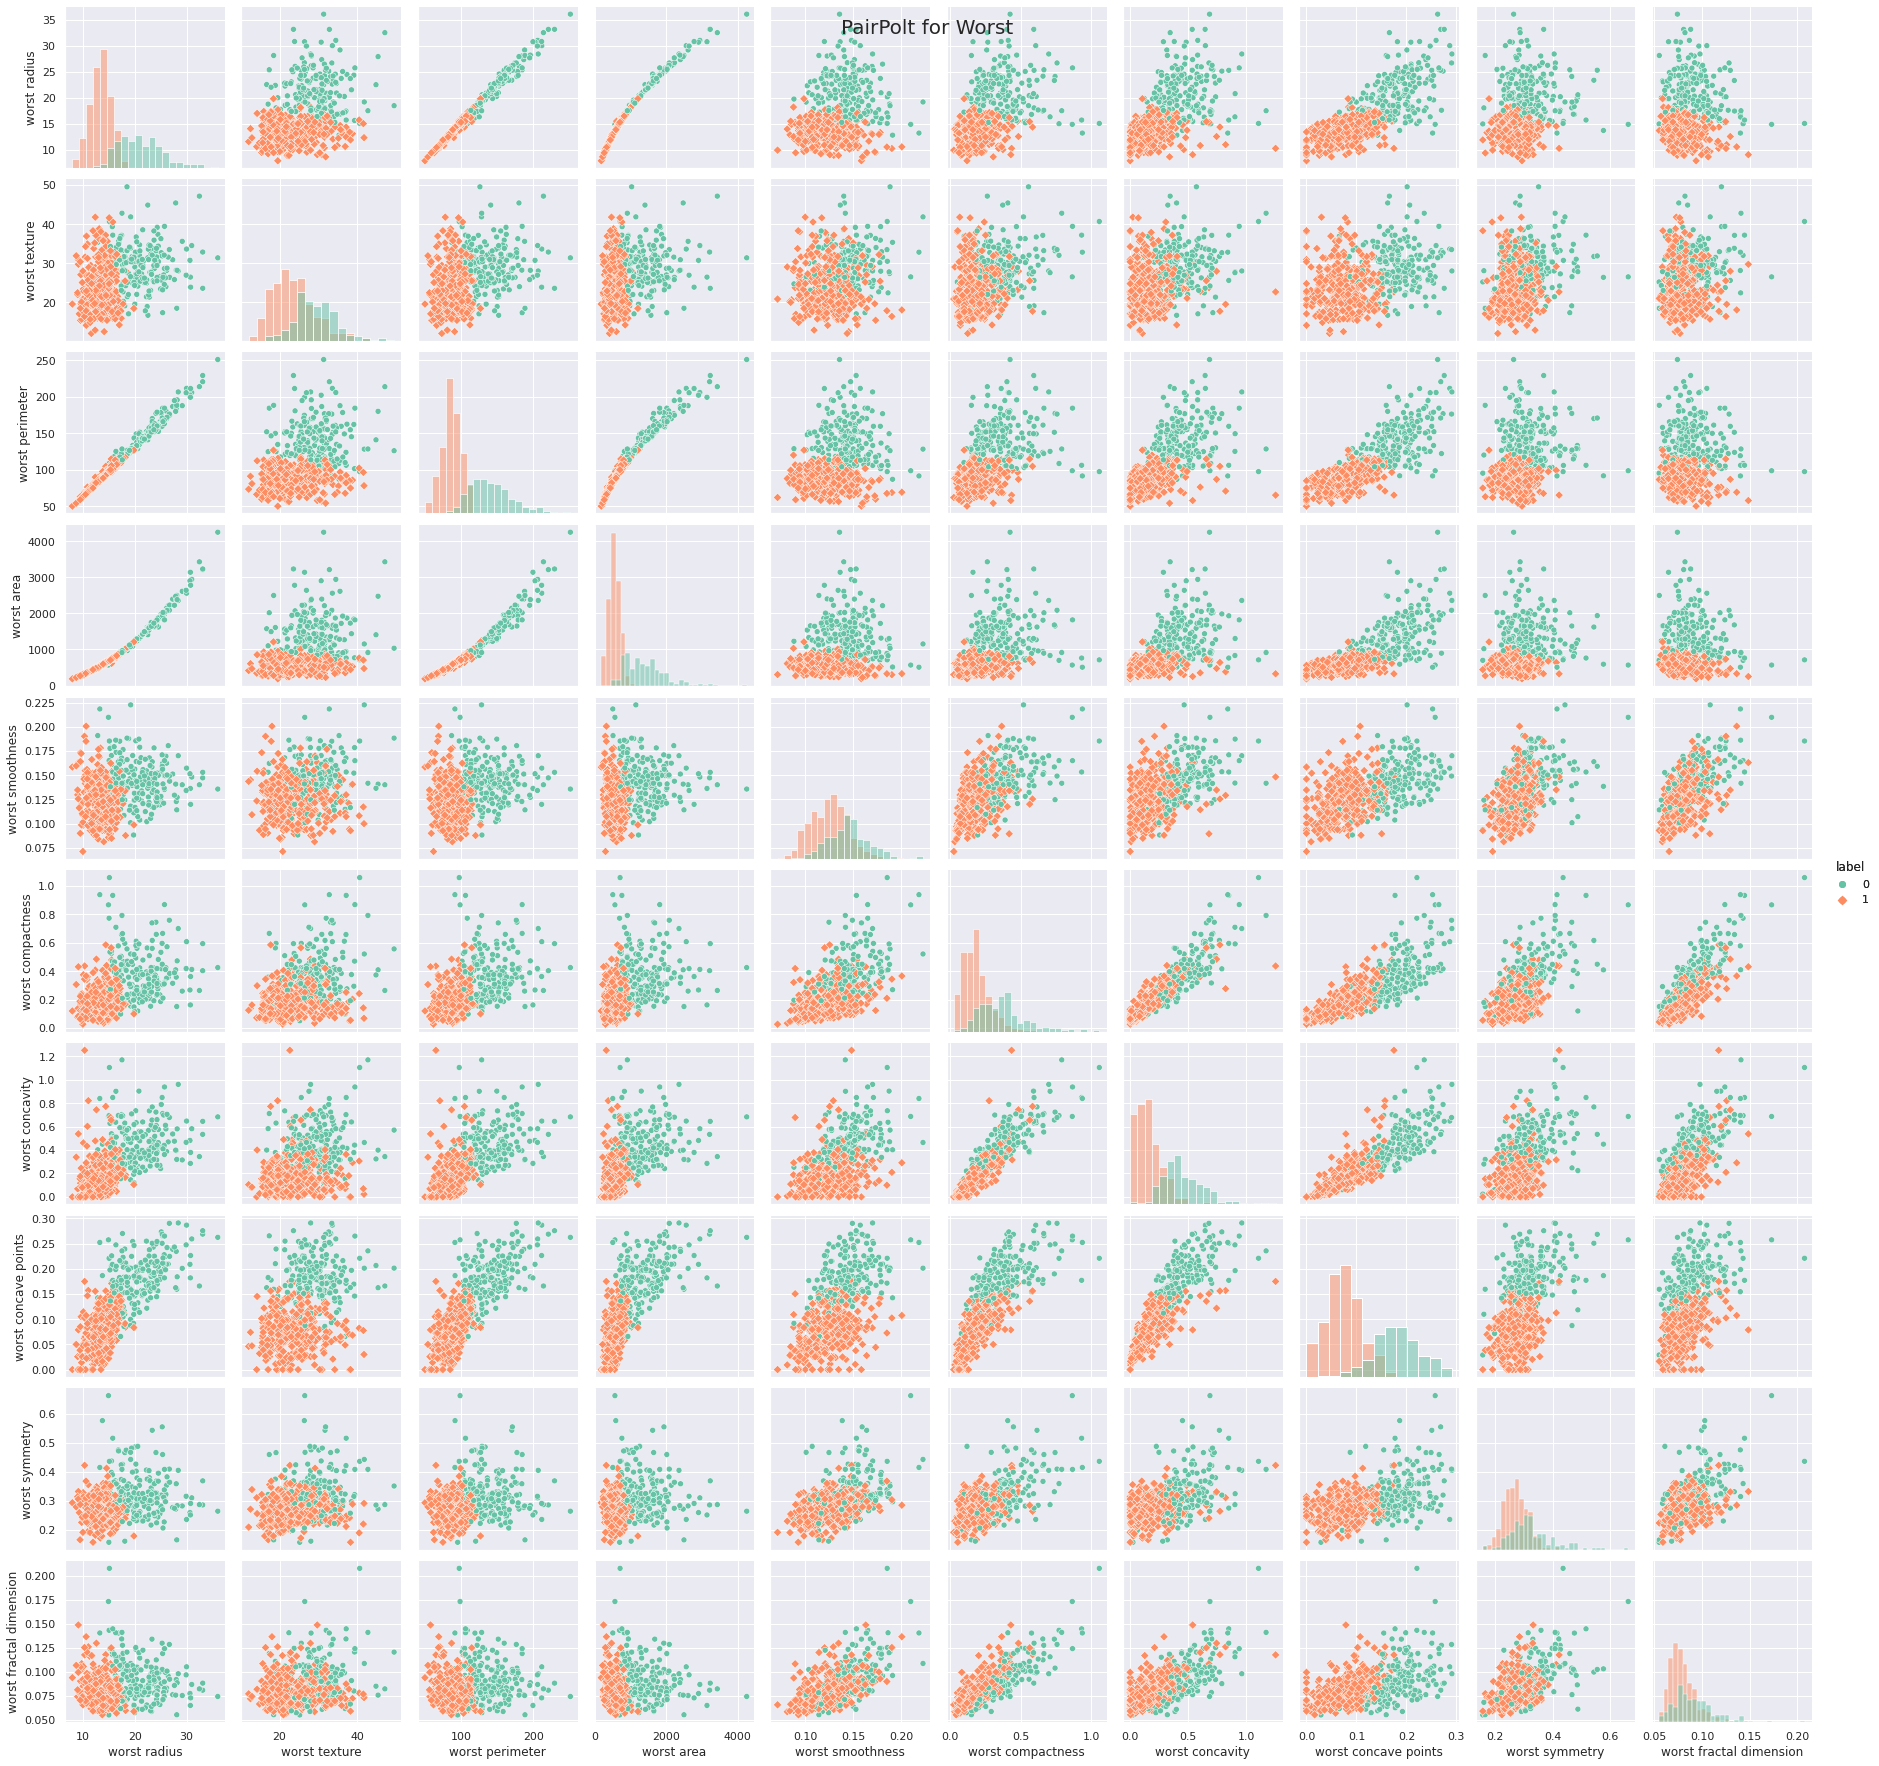

In [ ]:
#PAIRPLOTS FOR WORST

worst=['worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension','label']
worst_data=data_set[worst]
g = sns.pairplot(worst_data, hue = 'label', markers=["o","D"],palette="Set2", diag_kind="hist")
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle('PairPolt for Worst ', fontsize = 20)

For 'worst' we can do the same observation like for 'mean'.

As we could expect the behaivours for the three kind of data are quite the same
. 

##Correlations
A factor that could affect good performance of the analysis is the correlation between attributets beacuse most of  classification algoritm showed in this work assume that all the predictors are indipendent.
For this porpuse Persaons's coeficient is calculatated as followed for each couple of random vector (X,Y):
$$\rho_{x,y}=\frac{Cov(X,Y)}{\sigma_x \sigma_y
}$$

Correlation is a normalization of the covariance by $\sigma_x$,$\sigma_y$, the respectivily standard deviation of X,Y.This number is in range [-1,1] and it measures the strenght of the correlations between X and Y. The higher the module of the value the strongher the correlation. 
It's important to note that $\rho$ represent only linear correlations and so a value of $\rho$ near by zero doesn't indicate necessarly absence of correlation. Can also means strong non linear correlation. 

In order to visualize the correlation between features I plot the following heatmap. The correlation is set to be in range [-1,1], and is max for dark blue.

We can observe that there are many features that have really high correlations and so a feature selection procedure for dimentsionality reducion is needed during preprocessing step. 




 


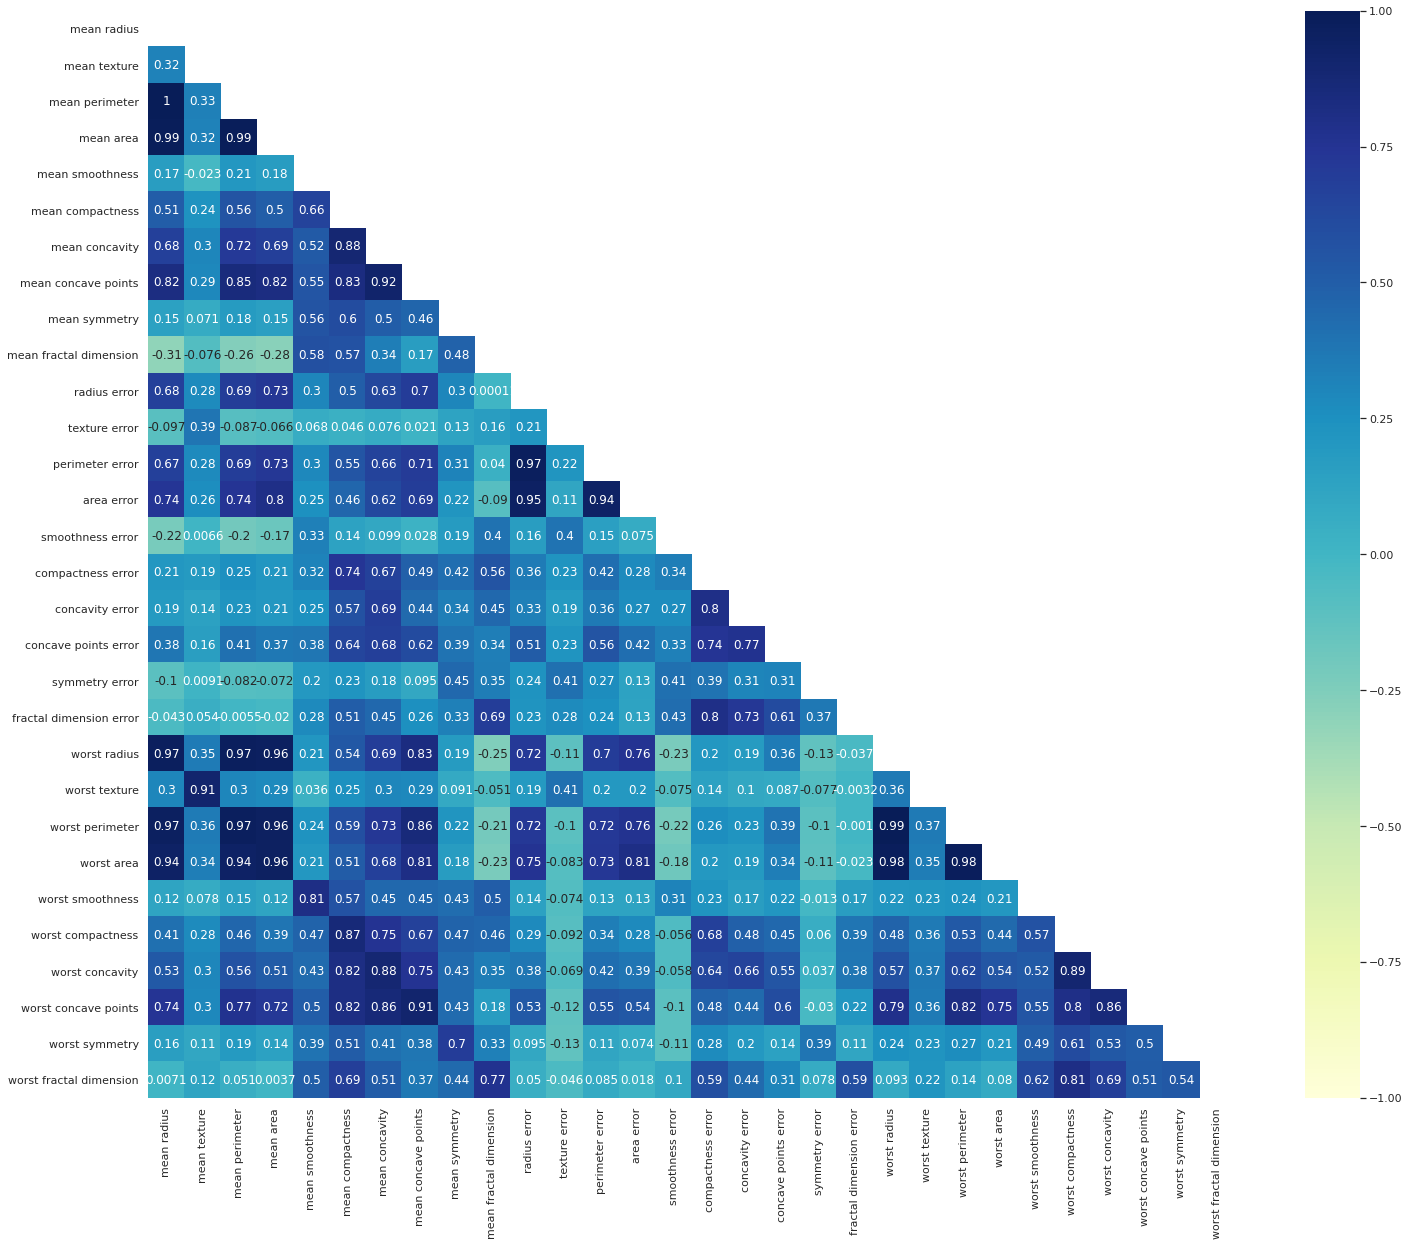

In [ ]:
#Heatmap for the correlation
cor_matrix=X.corr()
mask = np.triu(np.ones_like(cor_matrix, dtype=bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25,20))
    ax = sns.heatmap(cor_matrix,mask=mask, square=True,cmap="YlGnBu",vmin=-1,vmax=1,annot=True)



#**Preprocessing**

##Train-Test Split
In order to create a learning algorith able to classify instances, we need to create a training set S, sampled from the entire dataset D, and to train our model triyng to minimize the training error. This approach is based on the Empirical Risk Minimization paradigm, that asserts that if S is representative of D, minimizing the error on S we are also minimizing the error on D.
So I split the dataset in two portion with the percentage 70% for the training set and 30%for the evaluation set.
In order to have both the two sets with approximately the same percentage of bening and milignant samples I adopt a statified strategy. 

It has to be considered that the split is randomly performed but for an effective  comparison across the different classifier I decide to always keep  the same one.





In [ ]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y)









##**Standardization**

The data exploration phase shows that features has widespread range of values , with different means and standard deviations. 
That can affetc the correctess of the classification task beacuse features with grater variance can influence more the objective function. In addition, many cassifications algorithm assume that data are zero centerend and with unit variance. So i conclude that is necessary to adopt a standardization tecnique. 

So indipendently for each  feature I subtract the mean and divide for the standart devitaion of the current feature.


The mean and the standard deviation are compunted only taking into account the training-set, and the transformation is then applied to the test-set because usally in the initial phase the test set is unknown. It's formally uncorrected taking into accound during training procedure any kind of information relative with the test set.

In the plot below we can visualize the standardized outputs.




<Figure size 1800x1440 with 0 Axes>

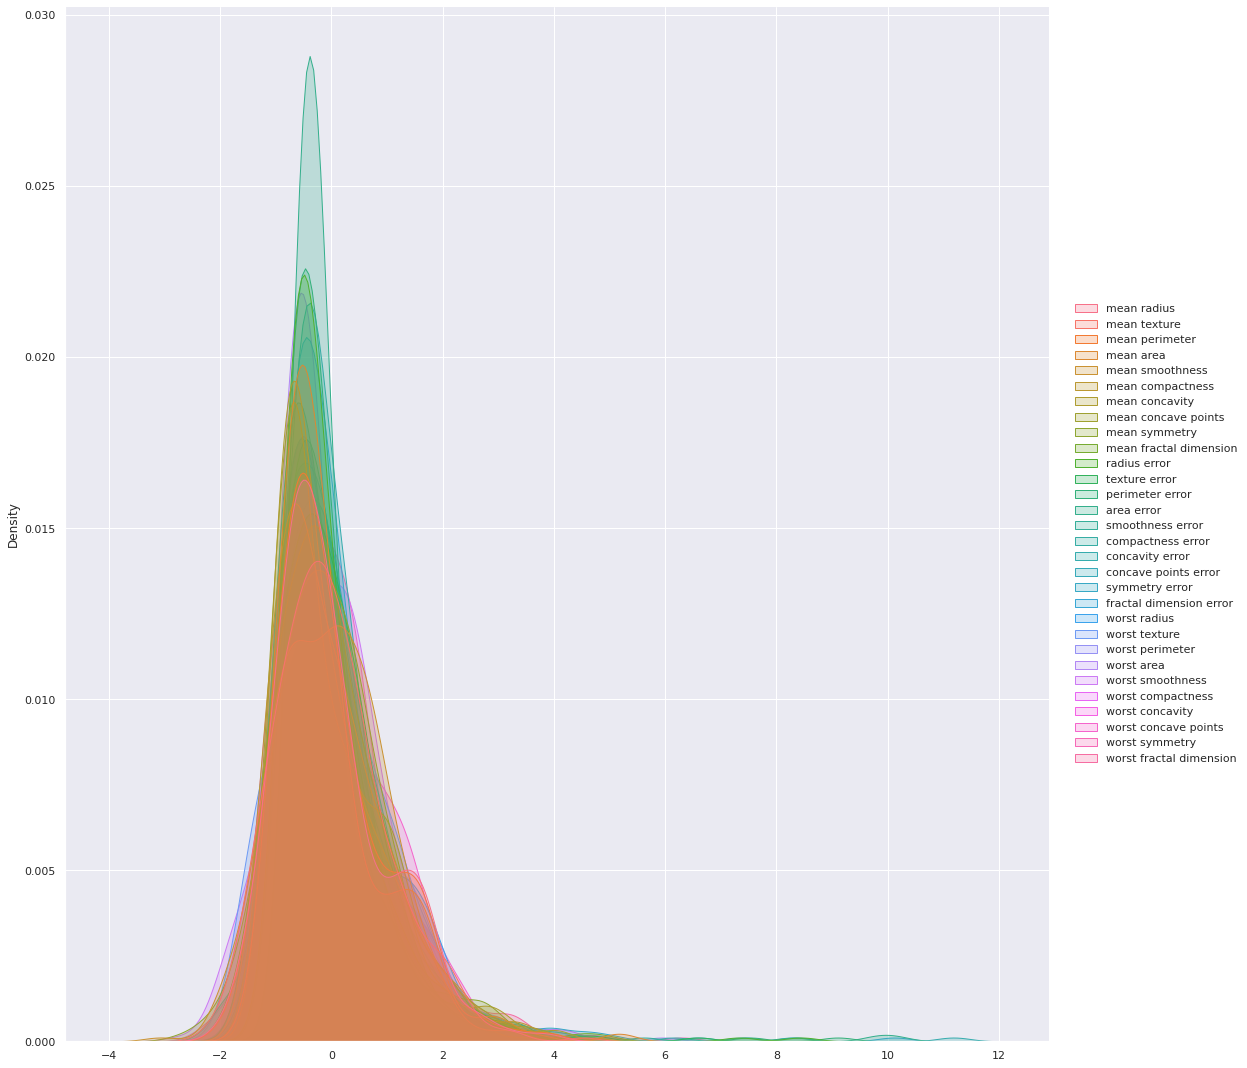

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.transform(x_test)

X_train=pd.DataFrame(X_train,columns=headers)
x_test=pd.DataFrame(x_test,columns=headers)
plt.figure(figsize=(25, 20))

sns.displot(data=X_train,kind="kde", fill=True,height=15)



##**Dimensionality reduction with Features Selection**

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.
There are 2 different type of feature selections algorithms:
* unsupervised features selection:Do not use the target variable (e.g. remove redundant variables thanks to Pearson's correlations coefincent);

* supervised features selection: use the target variable and choose the best k in the specific classification tack)

I decide to try both the methond and make comparison between the resuting model.





### **Unsupervised Features Selections**

As we had observed in the correlation heatmap, in the dataset there are many features that are strongly linear correlated. It is not meaningfull to keep all of them into account. I remove featurs with person's coeficients >=0.95 with other predictors. 

In [ ]:
corr=X_train.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns = X_train.columns[columns]
unsup_df=X_train[selected_columns]
print(selected_columns)
unsup_test=x_test[selected_columns]

print(len(selected_columns))




Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')
23


The selected features are 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean', 'radius_se\ttexture_se','perimeter_se\tarea_se', 'compactness_se', 'concavity_se', 'concave','points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst','perimeter_worst', 'compactness_worst', 'concavity_worst', 'concave','points_worst', 'symmetry_worst', 'fractal_dimension_worst'.
The resulting DataFrame object has only 23 features.


### **Supervised Features Selection**

In supervised features selection, there is a different approach: we need to set a priori the hyperparameter K( number of best attribute desired) and than we can evaluate how good the model performs only when the classification models gives its results.
And also the hyperparametes of the classification models need to be tuned. So, at each step, we need to define both K and model hyperparameters.


I choose the the RFE module provided by sklearn.
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination
(RFE) is to select features by recursively considering smaller and smaller
sets of features. First, the estimator is trained on the initial set of
features and the importance of each feature is obtained. In this case I use the precision score of the classification in order to choose the best features set.(better explained later).
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned set until the desired
number of features to select is eventually reached.






##**Oversampling**

This bias (caused by umbalance in the label count ) in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

Usally oversampling is a more stable choiche beacuse guarant to don't lose any information in the training set. In this specific case I adopt oversampling according to the size of my data set.
 
 I used the SMOTE module provided by imblearn, SMOTE randomly selects a minority class istance point and finds its k nearest minority class neighbors, then it creates new artificial samples along the lines between the selected point and one of the neighbors.

 Of course the oversempling tecnique is adopted only on the training set.

In [ ]:
from imblearn.over_sampling import SMOTE
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_train, y_train)
print("Oversampling on X generate a dataset of", X_SMOTE.shape, "istances, while the original dataset had ",len( unsup_df), " instances")
print( 'The new dataset has' , np.count_nonzero(y_SMOTE == 0), 'elements for bening, and', np.count_nonzero(y_SMOTE == 1), 'elements for malignant.')

smote_df=pd.DataFrame(X_SMOTE,columns=headers)
smote_df.describe()

X_SMOTE_unsup,y_SMOTE_unsup=SMOTE().fit_resample(unsup_df, y_train)

X_SMOTE.head()



Oversampling on X generate a dataset of (500, 30) istances, while the original dataset had  398  instances
The new dataset has 250 elements for bening, and 250 elements for malignant.


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.828551      1.763105        0.781845   0.767065         0.161590   
1     0.811577      1.044874        0.847550   0.678367         1.608654   
2    -0.786804     -0.108373       -0.820933  -0.734350        -0.666003   
3    -0.829239      3.272069       -0.877604  -0.760174        -1.317601   
4    -0.246466      0.206561       -0.198794  -0.315559         0.519165   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.109456        0.112091             0.383942      -0.068620   
1          0.852420        1.832824             1.833784       1.582728   
2         -1.063118       -0.824061            -0.718653       0.729834   
3         -1.339131       -1.056213            -1.114738       0.120105   
4          0.736933        0.084877             0.313249       0.588290   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.001707  ...      1.396105       1.400485         1.345414   
1                0.145901  ...      0.961730       1.011709         0.864003   
2               -0.463709  ...     -0.817533       0.047868        -0.845308   
3               -0.645021  ...     -0.817533       2.581392        -0.870882   
4                0.716963  ...      0.230812       0.349170         0.171974   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    1.352716          1.191496          -0.099056        -0.089035   
1    0.816443          1.341790           0.610741         1.305430   
2   -0.744217         -0.939140          -1.036879        -0.980896   
3   -0.723754         -1.463400          -1.216588        -1.227303   
4    0.045904          0.882067           0.715778         0.395647   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.606093        0.174350                 0.359941  
1              1.059828        1.052552                 0.035779  
2             -0.846326        0.608385                -0.798741  
3             -1.343725        0.007154                -0.623200  
4              0.508198        1.405522                 1.038550  

[5 rows x 30 columns]

# **Classification Algorithms**

In a general classification problem, the goal is to learn a classifier that performs well on unseen data drawn from the same distribution as the available data; in other words, to learn classifiers with good generalization. One common way to estimate generalization capabilities is to measure the performance of the learned classifier on test data that has not been used to train the classifier.
In order to compare models and find the one that performs better, it's needed to define which metrics will be used to evaluate performances.


Let: $TP$ = True positives, $TN$ = True negative, $FP$ = False positive, $FN$ = False negative.
For this task I choose the following metrics:

Accuracy = $\frac{TP + TN}{TP+TN + FP + FN} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

Precision = $\frac{\text{TP}}{\text{TP + FP}}$

Recall = $\frac{\text{TP}}{\text{TP + FN}}$


F1 Score = $2 \cdot \frac{\text{Precision}\cdot \text{Sensitivity}}{\text{Precision + Sensitivity}} $

Note that since we want to detect cancer everytime there is one, we might focus on having a good precision rather than a good accuracy or recall beacuse the worst case in real life is a case of false positive, that is a case in which the diagnosis is for bening mass but it's not.

For all the following alghorithm is adopted a stratified k-fold corss validation stategy for tuning the hyperparameters that consist in splitting the training set in k partition , train the model on k-1 partion and finally evaluate it on the remaining one. In order to choose the best configuration I used the precision score.

After tuning I test the model on the test set and plot the discussed metrics.








##**Decision Tree**

The decsion tree is the one of the intuitive and interpretable supervised learning. It's a model that predicts the class of the target variable by learning simple decsion rule inferred form data.

The  predictor  space,   the  set  of  possible  values X1,X2,...,Xj,  is  divided  in j non-overlapping  regionsR1,R2,...Rj(these regions could have any shape but high dimensional rectangles are chosen for simplicity of the interpretation of the resulting predictive model).  Since it is computationally very expensive to divide in every possible partition the space, a top down, greedy approach is used:  the algorithm starts form a first node in the tree and then at each step the predictor space is split and this split is performed by choosing the best one in that level of the tree rather than looking ahead to find the split that will lead to a better final result.
 In order to choose the best split different types of impurity measure of the nodes are defined. For this work i used the Gini index. Gini index computes the impurity of the nodes as 1- the squared frequencies of class k appereing at node t.It's a sort of measure of the probability of a particular variable being wrongly classified when it is randomly choosen. 

A decsion tree is computed form the training data and then tested on the test set. I tuned different hyperparamether with the stratified k-fold cross validation using k=5 . This tuning phase also include the tuning of the number of best features selceted with RFE.

In order to make comparison between the two different kind of feature selection I also fine tuned the model with the training-set obtained with unsupervised features selections. For the tuning phase the crucial metrics is Precision.

With supervised Fetaure selection the best configuration is reached with :

* max_deph: 5
* max_features: log2
* num_best_features 11
* best_features= 
        'mean concavity', 'mean concave points', 'mean symmetry',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness'
The confusion matrix calculated on the test set is: 

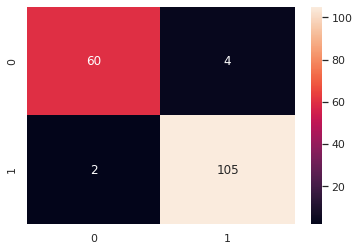;

* Recall is:  0.9813084112149533
* Accuracy is:  0.9649122807017544
* F1 score is:  0.9722222222222222
* Precision is: 0.963302752293578

With unsupervised features selection the best configuration is reached:

* max_deph: 15
* max_features: log2

The confusion matrix calculated on the test set is: 

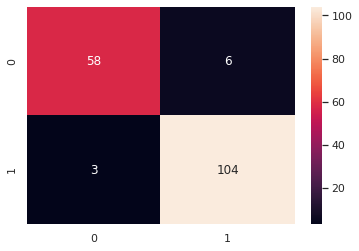

* Recall is:  0.9719626168224299
* Accuracy is:  0.9473684210526315
* F1 score is:  0.9585253456221198
* Precision is: 0.9454545454545454

As we can clearly  note the best configuation reached with supervised feature selection also leads to better performance in terms of all the scoreses.
On more important thing is that with unsupervised features selection we obtain the best configuation just thanks to 11 features (against the 23 of the unsupervised method). This means a more interpretable and in term of computation efficience model.

(The code is reported at the end of the colab notebook for space reasons)







##**Random Forest**

A random forest is an estimator that fits a number of decision tree classifiers(ensamble of tree) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
The key point of this method is that large number of relatively uncorrelated models (decision tree) will leads to better performance than any of the insividual model.
The uncorrelation between model is the main point of the random forest and it's relaized thanks to two different method:
* Bagging (Botstrap aggregation) : beacuse of the fact that the decsion trees are really sensitive to the data they are treined on , each tree of the random forest is trained on a sample of the same size of the training dataset randomly choosen with replacement. 
* Feature randomness: each decision tree of the resulting model can pick features from a random subset of all the dataset features.

In conclusion we can say that a random forest is a more stable method because the overall (over all the trees) prediction has a lower variance. That's beacuse if we take n indipendent observations each with know variance, the variance of the mean of the observations is lower than the single observation ones ( because is divided by n the number of osservations).

A Random Forest  is computed from the training data and then tested on the test set. I tuned different hyperparamether with the stratified k-fold cross validation using k=5 . This tuning phase also include the tuning of the number of best features selceted with RFE.

In order to make comparison between the two different kind of feature selection I also fine tuned the model with the training-set obtained with unsupervised features selections. For the tuning phase the crucial metrics is Precision.

With supervised Feature selection the best configuration is reached with :

* max_deph: 5
* num_of_estimator: 40
* num_best_features : 21
* best_features are: 
        'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean concavity', 'mean concave points',
       'area error', 'smoothness error', 'concavity error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'

The confusion matrix calculated on the test set is :

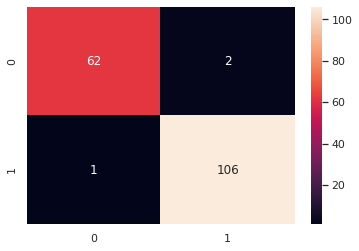


* Recall is:  0.9906542056074766
* Accuracy is:  0.9824561403508771
* F1 score is:  0.986046511627907
* Precision is: 0.9814814814814815

With unsupervised features selection the best configuration is reached with:

* max_deph: 20
* number_estimators 40

The confusion matrix calculated on the test set is:


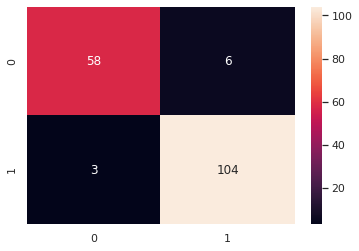


* Recall is:  0.9719626168224299
* Accuracy is:  0.9473684210526315
* F1 score is:  0.9585253456221198
* Precision is: 0.9454545454545454

As expected the Random forest outperform the decsion tree in terms of all the scores. And as in the decsion Tree the best performance is reached with supervised feature selection. Note that with the Random Forest the best number of features is 21, bigger than the one selected with decsion tree. Thats reasonable because the Random forest has the chance to take into account different subsets of features and so it's possible that a more complete set of features is representative. 


##**Support Vector Machine**





###**Linear SVM**
The linear SVM goal in its hard margin formulation is to find a hyperplane in the feature space that correctly separates all the classes with the largest possible margin(the margine is the distance between the hyperplane and the nearest points of each class).
The equation of the plan is $w^T +b=0$  where $\vec{w},b$ are define in order to maximize its distance to the nearest points from either group. We can also note that the plans defined by the the support vector for a binary classification has respectively the equations: $w^T +b=1$ and $w^T +b=-1$, where the margin  is given by $\frac{2}{||w||}$. 
So we can define the primal optimization problem as:
$$min||\vec{w}||^2$$ given the constrain that $y_i(w^t+b)>1$

This model assume that data are linearly separable otherwise no feasible solution is found.

A first way to extend SVM to cases where data are not linearlly separable is the soft-margin SVM.The point is to allow to some of the data to lay between the separating hyperplane and their marginal hyperplane, or even being put on the wrong side of the separating hyperplane. In order to do that we add a slack variable $ξ_i$ to the problem constraints:
 $$y_i(w^t+b)>1-ξ_i$$ with
 $$ξ_i>=0$$

Now our optimization problem has changed from “find an hyperplane with the widest margin possible stated that every point is properly classified” to “find an hyperplane with a wide enough margin taking into account that we also want to minimize the sum of the slack” (which means that we want to put as many points as possible on the right side of their marginal hyperplane). In other words, our optimization problem is the following:
$$min_{ w,b}+\frac{1}{2}‖w‖ 2 + C ∑_1^n ξ_ii$$
Given the above constraints. As we can see the parameter C regulates the tradeoff between obtaining a
large margin and do not misclassifying training points.

With all the previus hypotesis (standardization, oversampling) with a stratify k-fold cross validation with k=5  the model is fine tuned for  the paramether C  and two approch in study: unsupervised feature selection and supervides feature selection.


With supervised Fetaure selection the best configuration is reached with :
* C=0.1;
* Optimal number of features : 18
* Best features :

      'mean area', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'area error', 'smoothness error', 'compactness error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points', 'worst fractal dimension'

The confusion matrix calculted on the test set is :


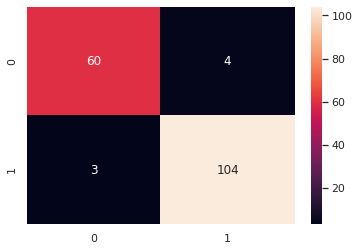


* Recall is:  0.9719626168224299
* Accuracy is:  0.9590643274853801
* F1 score is:  0.9674418604651163
* Precision is: 0.9629629629629629


With unsupervised features selection the best score is reached with :

* C=0.1

The confusion matrix of the predicrion of the test set is:


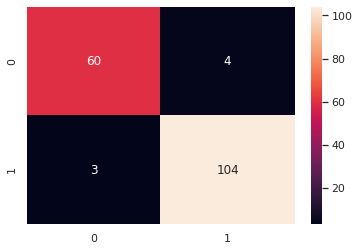




* Recall is:  0.9813084112149533
* Accuracy is:  0.9532163742690059
* F1 score is:  0.963302752293578
* Precision is: 0.9459459459459459

As we can see in this case the result are more similar and there are no significative difference between the two features selection tecnique. The global performance of the linear SVM classifier is good but non high as the ones for the Random Forest classifier.










###**SVM with kernel**###

The goal of an SVM algorithm as we saw is to find a hyperplane that could separate different classes of
samples in their feature space with the largest possible margin. It is possible to enforce hard constraints on
the correct classification of the samples or soften those constraints by adding a slack variable, but still SVM
is only able to define linear boundaries. When the classification problem is non-linear, the ideal would be to
find some non-linear decision boundaries. A simple solution is to
map our data in a higher dimensional space where they are linearly separable and then apply an SVM
estimator. So, given a mapping function φ we want to solve the following optimization problem
$$min_{ w,b}+\frac{1}{2}‖w‖ 2 + C ∑_1^n ξ_ii$$
constrained by

$$y_i (φ(x i ) w^T + b) ≥ 1 − ξ i$$
$$ξ_i ≥ 0$$

Unfortunately finding such $φ$ is not an easy task and, even when we find it, the mapping could be computational heavy or even unfeasible. There is a method to avoid the explicit computation of the mapping, and that is the kernel trick. The optimal $w, b $ we are searching in our problem (the same applies for the linear SVM) can be found by mean of the Karush-Kuhn-Tucker theorem that is a generalization of the method of Lagrange multipliers (which allows only equality constraints). The theorem states that an optimal point (not
necessarily the global optimum) for the problem is a saddle point of its Lagrange function representation
and for that point the Karush-Kuhn-Tucker conditions hold. In our case, with slack variable and non-linearity,the Lagrange function would be $$L(w, b, ξ , α, η) = \frac{1}{2}‖w‖+ C ∑ ξ i − ∑ α_i [y_i (φ(x_i ) w^T+ b) − 1 + ξ_i ] − ∑η_i ξ_i$$

We have two ways to find this saddle point, we can maximize $L(w, b, ξ , α, η)$ with respect to $α, η $ and then
minimize with respect to $ w, b, ξ $ and that is the primal optimization problem, or first minimize $L(w, b, ξ , α, η)$
with respect to $w, b, ξ$ and then maximize with respect to $α, η$ and this solves the dual optimization problem.
In general this two approaches do not necessarily lead to the same solution (the dual problem provides a lower bound for the solution of the primal) but since our problem is convex, because is about minimizing a quadratic objective function with linear constraints, and it admits a solution that is subject to all the constraints with strict inequality (Slater’s condition) then the primal and the dual problem give the same solution (strong duality).
 Moreover, the KKT conditions are not only necessarily but also sufficient for the solution to be a global optimum. The fact that we can solve the problem in its dual or primal formulation indifferently is particularly useful because the dual problem depends only on the dot product of the samples.

$$max_α − ∑ α_i α_j y_i y_j φ(x_i )  φ(x_j )^T + ∑ α_i$$

subject to

$$∑ α_i y_i = 0 \ with \ α_i ∈ [0 , C]$$
i
This formulation allows us to exploit the above-mentioned kernel trick. Instead of mapping the features in a higher space and then compute the dot product, we design a kernel function
$$K(x_i , x_j ) = φ(x_i ) φ(x_j )^T$$
That allow us to compute the dot products without leaving the original dimensional space of the features, even without knowing the mapping function φ that could be, like in the case of the RBF kernel used in this
homework, infinite-dimensional. The RBF kernel is defined as follows.
$$K(x i , x j ) = e^{−\frac{‖x_i −x_j ‖}{2\sigma ^2}}$$

An equivalent definition is $$K(x i , x j ) = e^{-\gamma‖x_i −x_j ‖}$$

That use the parameter $\gamma=\frac{1}{2\sigma ^2}$
As we see the RBF kernel is in the form of a Gaussian function and the $γ $ parameter is is inversely proportional to its variance. The effect of γ can be intuitively comprehended by observing that K could be seen as a similarity measure, because its value is between 0 (in the limit) and 1 (when x_i = x_j ) and decreases with the distance between x_i and x_j . 
Then, when $γ$ is small $ K(x_i , x_j ) $ tend to be 1 for every couple of samples $ (i ,j)$, this means that all of our data are basically the same, so the classifier struggles to discriminate different
classes of points. 
At the same time when $γ$ is too big $K(x_i , x_j )$ tend to be 0 which means that every sample is unique, and this makes our estimator unable to generalize. Another interpretation of $γ$ which is related to
the one already presented is that it can be seen as the inverse of the radius of influence of a support vector.
It means that with low values of $γ$ each support vector will have influence on the decision of the class in a wider space around it, with the result of less curve boundaries. On the other hand, high values of $γ$ means
that each support vector influence accounts only in a region very close to it, and that determinates much more curve boundaries that try to mimic the shape of the classes in the feature space.

So as with all the other classifier I train the model with just unsupervised features selection strategy. When using kernel is not easy evaluate the goodness of features during the classification because mapped in a new space and also the module of sklearn RFECV doesn't support this configuration.
With k-fold cross validation strategy I tuned both C and gamma.

The best configuration is reached with :

* C=10;
* gamma=0.01


The confusion matrix is :




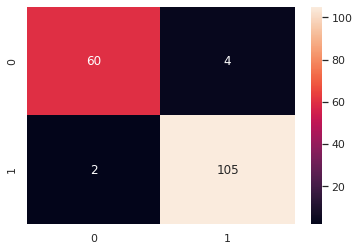


* Recall is:  0.9813084112149533
* Accuracy is:  0.9649122807017544
* F1 score is:  0.9722222222222222
* Precision is: 0.963302752293578


In cocnlusion the result are similar to the one achived with the linear kernel, but the best case for this classification task remain Random Forest.





##**Logistic Regression**

The logistic regression in a generalization of linear regression that allow to solve binary classification problems. In order to execute this generalization, the steps are:

* 1) substitute the normal distribution for error with a Bernoulli  Distribution: $p(y|\hat{x},\hat{w}) = Ber(y| \mu(\hat{x}) ) $, where $\mu(x)$ = $p(y=1| \hat{x})$
* 2)coumpute a linear combination of inputs in order to be shure that $0 \leq \mu({\hat{x}}) \leq 1$1 by using a sigmoid function :
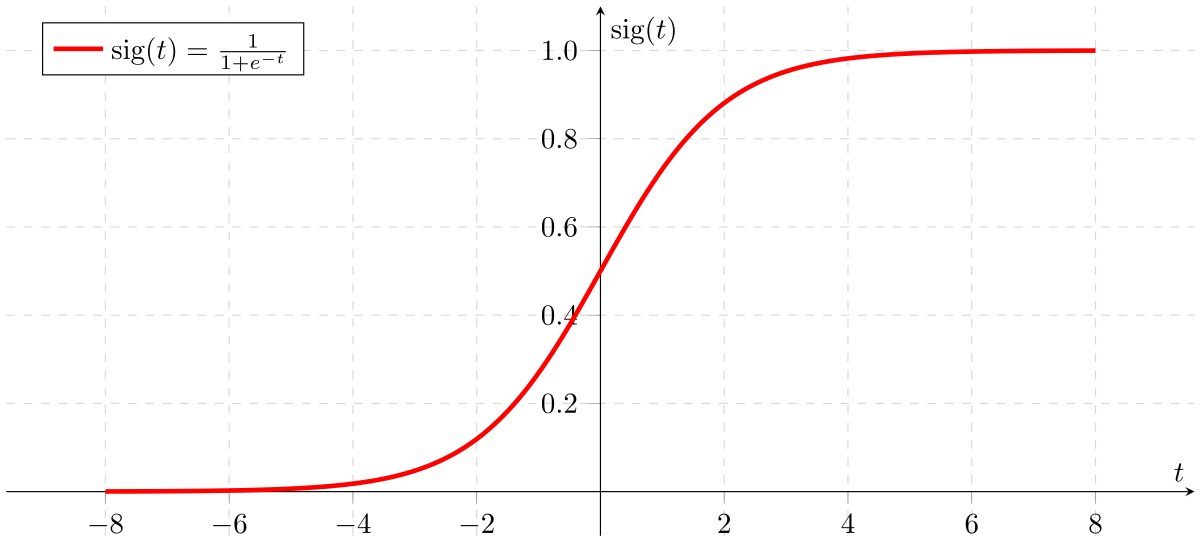


I trained the model after supervised features selection trying both the l1, and l2 loss function and tuning the paramether C. The best configuration is reached with:






With supervised feature selection the best configuration is reached with :

* C=10;
* loss=l2;
* best features are 15:
       'mean radius', 'mean texture', 'mean area', 'mean concavity',
       'mean concave points', 'mean fractal dimension', 'area error',
       'compactness error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst smoothness', 'worst concave points',
       'worst symmetry'


The confusion matrix on the test set is:




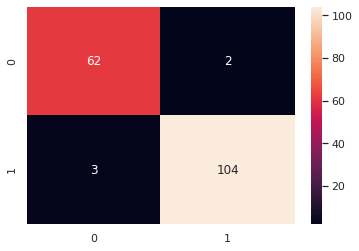





* Recall is:  0.9719626168224299
* Accuracy is:  0.9707602339181286
* F1 score is:  0.9765258215962441
* Precision is: 0.9811320754716981

With the unsupervised features selction training set the best configuration is :

* C=0.1
* loss='l2'

The confusion matrix get testing is:



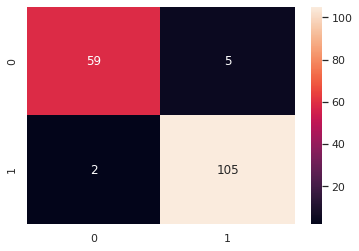




* Recall is:  0.9813084112149533
* Accuracy is:  0.9590643274853801
* F1 score is:  0.967741935483871
* Precision is: 0.9545454545454546


In this case the scores are quite similar but of course using 15 features instead of 23 is computational more efficient and it's always a good choiche if there is no loss in term of performance.







##**KNN classifier**

K-Nearest Neighbors is classification alghorithm 

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point. 

The closness can be avaluated with different method. The principal are:

* Euclidean:$ \sqrt{\sum_{i=1}^{k}(x_i-x_j)^2} $
* Manhattan :$\sum_{i=1}^{k}|x_i-x_j|$
* Minkowski :$(\sum_{i=1}^{k}|x_i-x_j|^p)^{\frac{1}{q}}$

Some consideration on KNN:
* Is not a learning alghorithm
* strongly depend on the data quality (standardization is quite always needed,outliers sensitive)
* The number of K can influence a lot 
* In high dimensional space the distances between two point lose meaning and so Knn suffer from curse of dimensionality.

The only paramether that has to be tuned is the K.

In order to apply a supervised feature selection for the KNN algorithm is necessary to use an external estimator that assigns weights to features. For this reason I choose the feature selected with the decision tree classifier in his best configuration on this task.

So I train the model on the following features : 

 'mean concavity', 'mean concave points', 'mean symmetry',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness'


 The best number of neighbord is 20.

 In this configuration the confusion matrix obtained testion on the test set is:



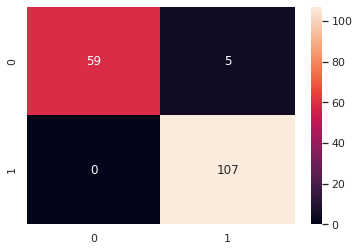


* Precision is: 0.9553571428571429
* Recall is:  1.0
* Accuracy is:  0.9707602339181286
* F1 score is:  0.9771689497716896

With the unsupervised features selection settings the best configuration is reached with K=3,and testion it on the test set the following confusion matrix is obteined:


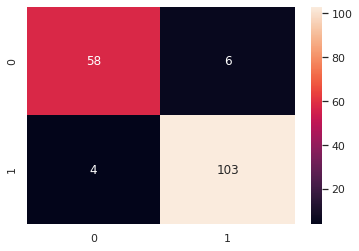


* Recall is:  0.9813084112149533
* Accuracy is:  0.9590643274853801
* F1 score is:  0.967741935483871
* Precision is: 0.9545454545454546


As we can see the improvment this time is almost remarkable. This behaivour is giustify by the fact that KNN classifier is strongly sensible to dimensionality. 



# **Conclusion**


As we can see for this specific binary classification task the best score reached testing on the test set is reached with Random Forest Classifier that has been improved using the supervised features selection. 
In all the other case the supervised feature selection tecninque doesn't show any particular improvment as expected. Is important to remark that feature selection is usefull in order to avoude the so called caurse of dimensionality. 
And so reduce the number of attributes withouth register loss in performance is still a good result. 

However all the method achive good performance but this is also due to the dataset wich has been constructed for the same porpuse of the analysis. 

Finally we can observe that even if the dataset is composed by 30 feature, also 10/15 of them are usefull for reach good performance. This dimensionality reduction leads  of course  to computationally improvement but also in term of interpretability of the model. 

#**Code for all the classifiers**

In [ ]:
head_tree=['mean concavity', 'mean concave points', 'mean symmetry',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness']
X_SMOTE[head_tree]

mean concavity  mean concave points  mean symmetry  concave points error  \
0          0.112091             0.383942      -0.068620              0.432272   
1          1.832824             1.833784       1.582728             -0.125670   
2         -0.824061            -0.718653       0.729834             -0.318531   
3         -1.056213            -1.114738       0.120105             -1.367495   
4          0.084877             0.313249       0.588290             -0.377228   
..              ...                  ...            ...                   ...   
495        2.483082             2.586857       1.232594              1.813260   
496        0.647392             0.957552       1.615093              0.220602   
497        0.721460             0.797625      -0.102605              1.640978   
498        1.466220             1.208697       2.239109              1.697778   
499        0.062438             0.488119      -0.370725             -0.472834   

     symmetry error  fractal dimension error  worst radius  worst texture  \
0          0.007880                 0.249286      1.396105       1.400485   
1          0.081801                 0.030633      0.961730       1.011709   
2          1.785869                -0.329000     -0.817533       0.047868   
3         -0.159414                -0.482019     -0.817533       2.581392   
4         -0.414895                -0.177923      0.230812       0.349170   
..              ...                      ...           ...            ...   
495        0.212461                 0.461767      1.727412       0.678711   
496       -0.708165                 0.040820      0.277710       1.254370   
497        1.571881                -0.000506      0.859470      -0.085392   
498        1.827513                 0.430024      0.339542      -0.935622   
499       -1.130364                -0.791199      1.104347      -0.021625   

     worst perimeter  worst area  worst smoothness  
0           1.345414    1.352716          1.191496  
1           0.864003    0.816443          1.341790  
2          -0.845308   -0.744217         -0.939140  
3          -0.870882   -0.723754         -1.463400  
4           0.171974    0.045904          0.882067  
..               ...         ...               ...  
495         1.821843    1.768157          0.758109  
496         0.456727    0.035610          0.925182  
497         0.792860    0.666823          0.140875  
498         0.510553    0.157814          0.248899  
499         0.981685    0.996007         -0.004485  

[500 rows x 11 columns]

In [ ]:
def build_classifier(X_train, y_train, X_test, y_test, clf_to_evaluate, scores, param_grid, n_folds=3 ):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf_to_evaluate, param_grid, cv=n_folds,
                       scoring=score, verbose=True, n_jobs=4, iid=False)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    return clf


    

In [ ]:
#Train Tree with unsupervised features selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
max_deph=[5,10,15,20]
num_estimators=[10,20,30,40]
best=0
bd=0
mf=0
k=0
num_best=0
for d in max_deph:
  for f in num_estimators:
    clf =RandomForestClassifier(random_state=42,max_depth=d,n_estimators=f) 
    clf.fit(X_SMOTE_unsup,y_SMOTE_unsup)
    print(clf.get_params)
    recall = recall_score(y_test,clf.predict(unsup_test))
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,clf.predict(unsup_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,clf.predict(unsup_test))
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,clf.predict(unsup_test))
    pre = precision_score(y_test,clf.predict(unsup_test))
    print('Precision is:' ,pre)
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
    if pre>=best:
        best=precision_score(y_test,clf.predict(unsup_test))
        bd=d
        mf=f
        num_best=rfecv.n_features_
        
print('CONCLUSION:')
print('best precision is:',best)
print('max_deph:',bd)
print('number_estimators',mf)


In [ ]:
#TRAIN WITH RFE On RF
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
max_deph=[5,10,15,20]
num_estimators=[10,20,30,40]
best=0
bd=0
mf=0
k=0
num_best=0
best_features=[]
for d in max_deph:
  for f in num_estimators:
    clf =RandomForestClassifier(random_state=42,max_depth=d,n_estimators=f) 
    rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='precision')   #5-fold cross-validation
    rfecv = rfecv.fit(X_SMOTE, y_SMOTE)
    print(clf.get_params)
    print('Optimal number of features :', rfecv.n_features_)
    print('Best features :', smote_df.columns[rfecv.support_])
    recall = recall_score(y_test,rfecv.predict(x_test))
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,rfecv.predict(x_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,rfecv.predict(x_test))
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,rfecv.predict(x_test))
    pre = precision_score(y_test,rfecv.predict(x_test))
    print('Precision is:' ,pre)
    if pre>=best:
        best=precision_score(y_test,rfecv.predict(x_test))
        bd=d
        mf=f
        num_best=rfecv.n_features_
        best_features=smote_df.columns[rfecv.support_]
        
      
  
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
print('CONCLUSION:')
print('best precision is:',best)
print('max_deph:',bd)
print('num_of_estimato:',mf)
print('num_best_features',num_best)
print('best_features=',best_features)


In [ ]:
#Unsupervised feature selection with KNN


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
C=[3,10,20]

for d in C:
  
  clf =KNeighborsClassifier(n_neighbors=d)
  clf.fit(X_SMOTE_unsup,y_SMOTE_unsup)
  print(clf.get_params)
  recall = recall_score(y_test,clf.predict(unsup_test))
  print('Recall is: ', recall)
  accuracy = accuracy_score(y_test,clf.predict(unsup_test))
  print('Accuracy is: ', accuracy)
  f1 = f1_score(y_test,clf.predict(unsup_test))
  print('F1 score is: ', f1)
  cm = confusion_matrix(y_test,clf.predict(unsup_test))
  pre = precision_score(y_test,clf.predict(unsup_test))
  print('Precision is:' ,pre)
  plt.figure()
  sns.heatmap(cm,annot=True,fmt="d")
  plt.show()


In [ ]:
#Train supervised feature selection KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
head_tree=['mean concavity', 'mean concave points', 'mean symmetry',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness']
C=[3,10,20]


for k in C:
    
    clf=KNeighborsClassifier(n_neighbors=k)
    
    clf.fit(X_SMOTE[head_tree],y_SMOTE)
    recall = recall_score(y_test,clf.predict(x_test[head_tree]))
    pre = precision_score(y_test,clf.predict(x_test[head_tree]))
    print('Precision is:' ,pre)
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,clf.predict(x_test[head_tree]))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,clf.predict(x_test[head_tree]))
    print('F1 score is: ', f1)
    print(k)
    cm = confusion_matrix(y_test,clf.predict(x_test[head_tree]))
    pre = precision_score(y_test,clf.predict(x_test[head_tree]))
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [ ]:
#Train Tree with unsupervised features selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
max_deph=[5,10,15]
max_features=['sqrt','log2']
best=0
bd=0
mf=0
k=0
num_best=0
for d in max_deph:
  for f in max_features:
    clf=DecisionTreeClassifier(random_state=42,max_depth=d,max_features=f)
    clf.fit(X_SMOTE_unsup,y_SMOTE_unsup)
    print(clf.get_params)
    recall = recall_score(y_test,clf.predict(unsup_test))
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,clf.predict(unsup_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,clf.predict(unsup_test))
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,clf.predict(unsup_test))
    pre = precision_score(y_test,clf.predict(unsup_test))
    print('Precision is:' ,pre)
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
    if pre>=best:
        best=precision_score(y_test,clf.predict(unsup_test))
        bd=d
        mf=f
        num_best=rfecv.n_features_
        
print('CONCLUSION:')
print('best precision is:',best)
print('max_deph:',bd)
print('max_features:',mf)


        



In [ ]:
#Train unsupervised features selction wit Logistic

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
C=[0.1,1,10]
penality=['l1','l2']
p=0
bd=0
best_gamma=0

for d in C:
  for g in penality:
    clf =LogisticRegression(solver='saga',random_state=42,penalty=g,C=d)
    
    clf.fit(smote_df.columns[rfecv.support_],y_SMOTE)
    print(clf.get_params)
    recall = recall_score(y_test,clf.predict(unsup_test))
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,clf.predict(unsup_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,clf.predict(unsup_test))
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,clf.predict(unsup_test))
    pre = precision_score(y_test,clf.predict(unsup_test))
    print('Precision is:' ,pre)
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()


In [ ]:
#TRAIN WITH RFE Logistic

from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
penality=['l1', 'l2']
C=[0.1,1,10]


num_best=0
best_features=[]
for c in C:
  for l in penality:

    clf=LogisticRegression(random_state=42,penalty=l,C=c,solver='saga')
    print(c,l)
    rfecv = RFE(estimator=clf)   #5-fold cross-validation
    rfecv = rfecv.fit(X_SMOTE, y_SMOTE)
    print(smote_df.columns[rfecv.support_])
    




In [ ]:
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
def plot_decision_boundaries(X_train,Y_train,model,stringa):

    h=0.07
    cmap_light = ListedColormap(['gold', 'mediumturquoise'])

    cmap_bold = ListedColormap(['orange', 'teal',])

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold,
                edgecolor='k', s=70)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(stringa)

    plt.show()
X_SMOTE.head()
hd=['mean radius','mean smoothness']
stringa='Dacision boundaries for mean area and mean smoothness, with C=0.1 ,LinearSVC'
cazzo=X_train[hd]
cazzo.to_numpy
print(cazzo.to_numpy)
b=cazzo.reset_index().values
c=y_train.values

clf=LinearSVC(C=0.1,random_state=42)
clf.fit(cazzo,y_train)
plot_decision_boundaries(b,c,clf,stringa)




In [ ]:

#TRAIN WITH RFE On SMVLinear
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
C=[0.1,1,10,100,1000,1000]
best=0
bd=0
k=0
num_best=0
best_features=[]
for d in C:
  clf =LinearSVC(random_state=42,C=d) 
  rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')   #5-fold cross-validation
  rfecv = rfecv.fit(X_SMOTE, y_SMOTE)
  print(clf.get_params)
  print('Optimal number of features :', rfecv.n_features_)
  print('Best features :', smote_df.columns[rfecv.support_])
  recall = recall_score(y_test,rfecv.predict(x_test))
  print('Recall is: ', recall)
  accuracy = accuracy_score(y_test,rfecv.predict(x_test))
  print('Accuracy is: ', accuracy)
  f1 = f1_score(y_test,rfecv.predict(x_test))
  print('F1 score is: ', f1)
  cm = confusion_matrix(y_test,rfecv.predict(x_test))
  pre = precision_score(y_test,rfecv.predict(x_test))
  print('Precision is:' ,pre)
  plt.figure()
  sns.heatmap(cm,annot=True,fmt="d")
  plt.show()
  if pre>=best:
    best=precision_score(y_test,rfecv.predict(x_test))
    bd=d
    num_best=rfecv.n_features_
    best_features=smote_df.columns[rfecv.support_]

  
print('CONCLUSION:')
print('best precision is:',best)
print('Best C:',bd)
print('num_best_features',num_best)
print('best_features=',best_features)

In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
#Train LINEAR SVM with unsupervised features selection

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
C=[0.1,1,10,100,1000,1000]
best=0
bd=0
mf=0
k=0
num_best=0

for d in C:
  clf =LinearSVC(random_state=42,C=d)
  
  clf.fit(X_SMOTE_unsup,y_SMOTE_unsup)
  print(clf.get_params)
  recall = recall_score(y_test,clf.predict(unsup_test))
  print('Recall is: ', recall)
  accuracy = accuracy_score(y_test,clf.predict(unsup_test))
  print('Accuracy is: ', accuracy)
  f1 = f1_score(y_test,clf.predict(unsup_test))
  print('F1 score is: ', f1)
  cm = confusion_matrix(y_test,clf.predict(unsup_test))
  pre = precision_score(y_test,clf.predict(unsup_test))
  print('Precision is:' ,pre)
  plt.figure()
  sns.heatmap(cm,annot=True,fmt="d")
  plt.show()
  if pre>=best:
      best=precision_score(y_test,clf.predict(unsup_test))
      bd=d
      
        
print('CONCLUSION:')
print('best precision is:',best)
print('Best C:',bd)




In [ ]:
#TRAIN WITH RFE On decsion TREE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
max_deph=[5,10,15]
max_features=['sqrt','log2']
best=0
bd=0
mf=0
k=0
num_best=0
best_features=[]
for d in max_deph:
  for f in max_features:
    clf =DecisionTreeClassifier(random_state=42,max_depth=d,max_features=f) 
    rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='precision')   #5-fold cross-validation
    rfecv = rfecv.fit(X_SMOTE, y_SMOTE)
    print(clf.get_params)
    print('Optimal number of features :', rfecv.n_features_)
    print('Best features :', smote_df.columns[rfecv.support_])
    recall = recall_score(y_test,rfecv.predict(x_test))
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,rfecv.predict(x_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,rfecv.predict(x_test))
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,rfecv.predict(x_test))
    pre = precision_score(y_test,rfecv.predict(x_test))
    print('Precision is:' ,pre)
    if pre>=best:
        best=precision_score(y_test,rfecv.predict(x_test))
        bd=d
        mf=f
        num_best=rfecv.n_features_
        best_features=smote_df.columns[rfecv.support_]
        
      
  
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
print('CONCLUSION:')
print('best precision is:',best)
print('max_deph:',bd)
print('max_features:',mf)
print('num_best_features',num_best)
print('best_features=',best_features)



In [ ]:

#Train LINEAR SVM with unsupervised features selection

from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
C=[0.1,1,10,100,1000,1000]
gamma=[0.001,0.01,0.1,1,10]
p=0
bd=0
best_gamma=0

for d in C:
  for g in gamma:
    clf =SVC(random_state=42,C=d,gamma=g,kernel='rbf')
    
    clf.fit(X_SMOTE_unsup,y_SMOTE_unsup)
    print(clf.get_params)
    recall = recall_score(y_test,clf.predict(unsup_test))
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,clf.predict(unsup_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,clf.predict(unsup_test))
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,clf.predict(unsup_test))
    pre = precision_score(y_test,clf.predict(unsup_test))
    print('Precision is:' ,pre)
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
    if accuracy>=p:
        p=accuracy
        bd=d
        best_gamma=g
        
        
print('CONCLUSION:')
print('best precision is:',best)
print('Best C:',bd)
print('Best gamma',g)